In [2]:
import pandas as pd
import numpy as np
import statistics

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


<h1>
Requirement 1: Loading Data
</h1>
Read TWO data files (JSON, CSV, Excel, etc.)

In [3]:
TeslaFi_Jan = pd.read_csv(("TeslaFi12023.csv"), low_memory=False)

In [4]:
TeslaFi_Feb = pd.read_csv(("TeslaFi22023.csv"), low_memory=False)

<h1>
Requirement 2:  Clean and operate on the data while combining them.
</h1>
Clean your data and perform a pandas merge with your two data sets, then calculate some new values based on the new data set.

<b>Merge</b> data with pd.concat

In [5]:
merged_TF = pd.concat([TeslaFi_Jan, TeslaFi_Feb])
merged_TF

,data_id,Date,calendar_enabled,remote_start_enabled,vehicle_id,display_name,color,backseat_token,notifications_enabled,vin,...,max_avail_temp,is_climate_on,right_temp_direction,min_avail_temp,rear_seat_type,power,steering_wheel_heater,wiper_blade_heater,side_mirror_heaters,elevation
0,935094,2023-01-01 00:00:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,935095,2023-01-01 00:01:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,935096,2023-01-01 00:02:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,935097,2023-01-01 00:03:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,935098,2023-01-01 00:04:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43003,1023913,2023-02-28 23:55:25,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,548.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
43004,1023914,2023-02-28 23:56:27,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,548.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
43005,1023915,2023-02-28 23:57:25,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,549.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN
43006,1023916,2023-02-28 23:58:25,1.0,NaN,1.754975e+11,Siri,NaN,<invalid>,NaN,5YJYGDED3MF111120,...,28.0,0.0,549.0,15.0,0.0,0.0,0.0,0.0,0.0,NaN


<b>CLEANING:</b> Drop columns that are not needed for this project, with 'df.drop()'

In [6]:
TF_clean = merged_TF.drop(columns=["data_id", "calendar_enabled", "vehicle_id", "display_name", "backseat_token", "vin", "backseat_token_updated_at", "id", "tokens", "id_s", "user_charge_enable_request", "time_to_full_charge", "charge_current_request", "charge_enable_request", "charger_phases", "battery_heater_on", "charger_power", "charger_pilot_current", "charge_port_latch", "charger_actual_current",	"scheduled_charging_pending", "fast_charger_type", "usable_battery_level", "motorized_charge_port", "charge_limit_soc_std", "battery_level", "charge_limit_soc", "charge_energy_added", "charge_port_door_open", "max_range_charge_counter", "charge_limit_soc_max", "ideal_battery_range", "max_avail_temp", "is_climate_on", "right_temp_direction", "min_avail_temp", "rear_seat_type", "power", "steering_wheel_heater", "wiper_blade_heater", "side_mirror_heaters", "elevation", "managed_charging_active", "charging_state", "fast_charger_present", "trip_charging", "managed_charging_user_canceled", "est_battery_range", "charger_voltage", "charge_current_request_max", "eu_vehicle", "charge_miles_added_ideal", "charge_limit_soc_min", "gps_as_of", "heading", "shift_state", "seat_heater_rear_right", "seat_heater_left", "idleNumber", "sleepNumber",	"driveNumber", "chargeNumber", "polling", "idleTime", "running", "rerunning", "driver_temp_setting", "locked", "center_display_state", "dark_rims", "odometerF", "car_version", "wheel_type", "car_type", "dr", "vehicle_name", "exterior_color", "left_temp_direction", "notifications_supported", "autopark_state", "df", "api_version", "third_row_seats", "pf", "calendar_supported", "rt", "pr", "has_spoiler", "roof_color", "valet_mode", "parsed_calendar_supported", "spoiler_type", "ft", "homelink_nearby", "remote_start_supported", "rhd", "is_front_defroster_on", "seat_heater_rear_left", "is_rear_defroster_on", "inside_temp", "outside_temp", "remote_start", "rear_seat_heaters", "seat_heater_rear_center", "seat_heater_right", "remote_start_enabled", "color", "notifications_enabled", "autopark_state_v2", "last_autopark_error", "autopark_style", "sun_roof_state", "seat_type", "sun_roof_percent_open", "charge_miles_added_rated", "scheduled_charging_start_time", "not_enough_power_to_heat", "charge_to_max_range", "managed_charging_start_time", "battery_current", "seat_heater_rear_left_back", "seat_heater_rear_right_back", "gui_charge_rate_units", "gui_temperature_units", "gui_range_display", "gui_distance_units", "sun_roof_installed", "perf_config", "gui_24_hour_time"
])
TF_clean

,Date,state,battery_range,charge_rate,longitude,latitude,speed,passenger_temp_setting,is_auto_conditioning_on,smart_preconditioning,fan_status,odometer,inside_tempF,driver_temp_settingF,outside_tempF,maxRange
0,2023-01-01 00:00:28,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.31
1,2023-01-01 00:01:28,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.31
2,2023-01-01 00:02:28,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.31
3,2023-01-01 00:03:28,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.31
4,2023-01-01 00:04:30,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43003,2023-02-28 23:55:25,online,200.23,0.0,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,67,228.31
43004,2023-02-28 23:56:27,online,200.15,0.0,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,66,228.31
43005,2023-02-28 23:57:25,online,200.13,0.0,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,66,228.31
43006,2023-02-28 23:58:25,online,200.13,0.0,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,66,228.31


<b>CLEANING:</b> Resampling of data as data is shown by default every minute.  

In [7]:
TF_clean["Date"] = pd.to_datetime(TF_clean["Date"])
TF_clean.set_index("Date", inplace=True)
TF_resample = TF_clean.resample('15T').first().reset_index()
TF_resample


,Date,state,battery_range,charge_rate,longitude,latitude,speed,passenger_temp_setting,is_auto_conditioning_on,smart_preconditioning,fan_status,odometer,inside_tempF,driver_temp_settingF,outside_tempF,maxRange
0,2023-01-01 00:00:00,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,228.31
1,2023-01-01 00:15:00,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,228.31
2,2023-01-01 00:30:00,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,228.31
3,2023-01-01 00:45:00,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,228.31
4,2023-01-01 01:00:00,offline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,228.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2023-02-28 22:45:00,online,161.98,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,71,69,67,228.31
5660,2023-02-28 23:00:00,online,170.39,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31
5661,2023-02-28 23:15:00,online,178.73,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31
5662,2023-02-28 23:30:00,online,187.70,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,67,228.31


<b>CLEANING:</b> Only show rows with status of "online"

In [8]:
TF_resample["state"] = TF_resample["state"]
TF_resample = TF_resample[TF_resample["state"] == "online"]
TF_resample

,Date,state,battery_range,charge_rate,longitude,latitude,speed,passenger_temp_setting,is_auto_conditioning_on,smart_preconditioning,fan_status,odometer,inside_tempF,driver_temp_settingF,outside_tempF,maxRange
60,2023-01-01 15:00:00,online,195.03,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,62.0,69.0,53.0,228.31
61,2023-01-01 15:15:00,online,194.46,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,68.0,69.0,54.0,228.31
62,2023-01-01 15:30:00,online,193.79,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,68.0,69.0,54.0,228.31
63,2023-01-01 15:45:00,online,193.88,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,64.0,69.0,55.0,228.31
64,2023-01-01 16:00:00,online,193.88,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,63.0,69.0,54.0,228.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2023-02-28 22:45:00,online,161.98,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,71,69,67,228.31
5660,2023-02-28 23:00:00,online,170.39,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31
5661,2023-02-28 23:15:00,online,178.73,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31
5662,2023-02-28 23:30:00,online,187.70,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,67,228.31


<b>NEW VALUE:</b> TeslaFi only shows "passenger_temp_setting" in Celsius.  We have created a new column converting to Fahrenheit.  New column name 'passenger_temp_settingF'.

In [9]:
TF_resample = TF_resample.assign(passenger_temp_settingF = TF_resample["passenger_temp_setting"].copy() * 1.8 + 32)

<b>NEW VALUE:</b> We have divided battery range and maximum range columns from our dataframe and multiplied that result by 100 to give us the average percentage of max range used. These results have been added as an additional column titled "avg_percentage_used".

In [10]:
TF_resample["avg_percentage_used"] = (TF_resample["battery_range"] / TF_resample["maxRange"]) * 100
TF_resample

,Date,state,battery_range,charge_rate,longitude,latitude,speed,passenger_temp_setting,is_auto_conditioning_on,smart_preconditioning,fan_status,odometer,inside_tempF,driver_temp_settingF,outside_tempF,maxRange,passenger_temp_settingF,avg_percentage_used
60,2023-01-01 15:00:00,online,195.03,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,62.0,69.0,53.0,228.31,66.92,85.423328
61,2023-01-01 15:15:00,online,194.46,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,68.0,69.0,54.0,228.31,66.92,85.173667
62,2023-01-01 15:30:00,online,193.79,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,68.0,69.0,54.0,228.31,66.92,84.880207
63,2023-01-01 15:45:00,online,193.88,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,64.0,69.0,55.0,228.31,66.92,84.919627
64,2023-01-01 16:00:00,online,193.88,0.0,-83.493188,38.185372,NaN,19.4,0.0,NaN,0.0,49682.773725,63.0,69.0,54.0,228.31,66.92,84.919627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,2023-02-28 22:45:00,online,161.98,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,71,69,67,228.31,68.00,70.947396
5660,2023-02-28 23:00:00,online,170.39,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31,68.00,74.630984
5661,2023-02-28 23:15:00,online,178.73,33.6,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,69,69,67,228.31,68.00,78.283912
5662,2023-02-28 23:30:00,online,187.70,33.7,-83.493178,38.185323,NaN,20.0,0.0,NaN,0.0,52675.960532,68,69,67,228.31,68.00,82.212781


<h1>
Requirement 3:  Visualize/Present your data.
</h1>
Make 3 matplotlib or seaborn (or another plotting library) visualizations to display your data.

<b>Visualization 1:<br></b>
Basemap of latitude/longitude points in January and February 2023

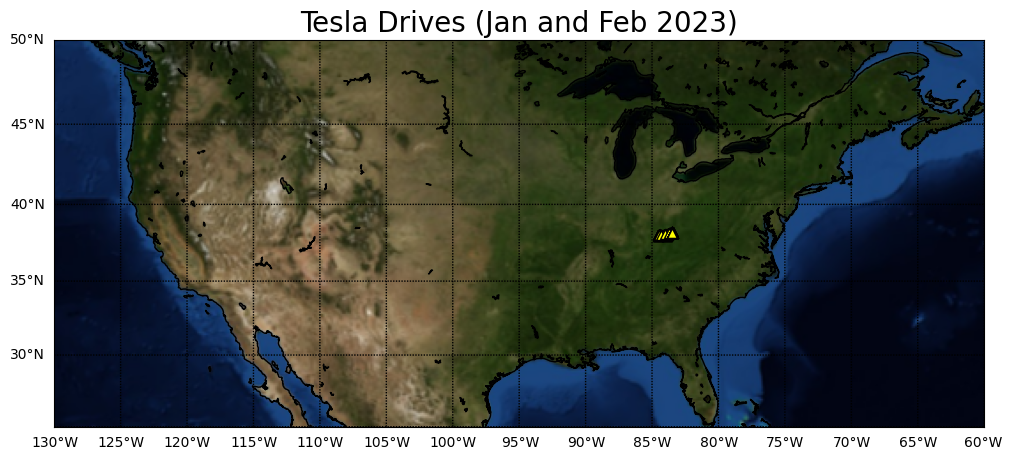

In [11]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 25,
           urcrnrlat = 50,
           llcrnrlon = -130,
           urcrnrlon = -60,
           resolution = 'i')
m.bluemarble(scale=0.5)

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,5),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,5),labels=[0,0,0,1])

sites_lat_y = TF_resample["latitude"].tolist()
sites_lon_x = TF_resample["longitude"].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, marker='^', c='yellow', alpha=1, edgecolor='k', linewidth=1, zorder=0)

plt.title("Tesla Drives (Jan and Feb 2023)", fontsize=20)

plt.show()

<b>Visualization 2:<br></b>
Zoomed in Basemap of latitude/longitude from January and February 2023.<br>
This vehicle is my wife's commuting car, we can clearly see her route to work; and, other stops that she (or we) make.  I have noted a few locations on the map.<br>
<i>NOTE: To more clearly show our travels, we have used the dataframe 'TF_clean' for this visualization.  Using 'TF_resample' shows far fewer points and is not as strong of a visualization.</i>

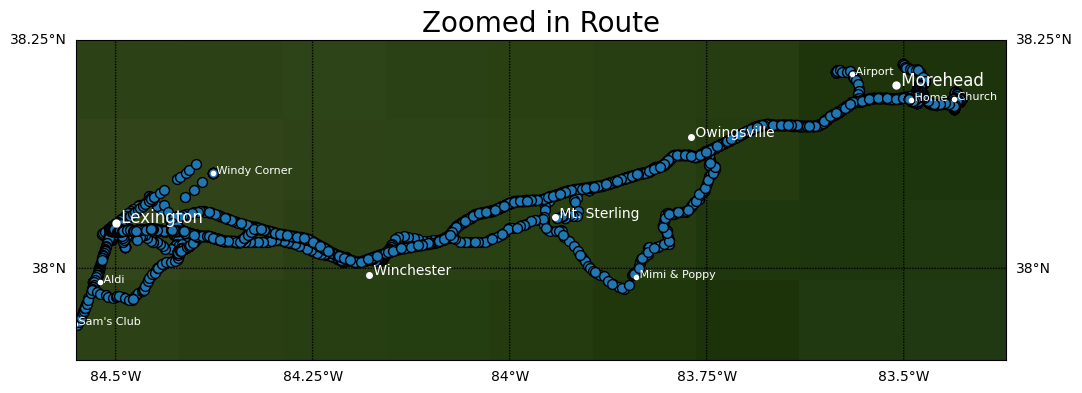

In [12]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = 37.90,
           urcrnrlat = 38.25,
           llcrnrlon = -84.55,
           urcrnrlon = -83.37,
           resolution = 'i')
m.bluemarble(scale=0.5)

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,.25),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,180,.25),labels=[0,0,0,1])

sites_lat_y = TF_clean['latitude'].tolist()
sites_lon_x = TF_clean['longitude'].tolist()

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

x, y = m(-83.51, 38.2)
plt.plot(x, y, 'o', markersize=5, color='white')
plt.text(x, y, ' Morehead', fontsize=12, color='white');

x, y = m(-84.5, 38.05)
plt.plot(x, y, 'o', markersize=5, color='white')
plt.text(x, y, ' Lexington', fontsize=12, color='white');

x, y = m(-83.84, 37.99)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Mimi & Poppy', fontsize=8, color='white');

x, y = m(-84.52, 37.985)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Aldi', fontsize=8, color='white');

x, y = m(-84.376, 38.104)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Windy Corner', fontsize=8, color='white');

x, y = m(-83.491, 38.184)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Home', fontsize=8, color='white');

x, y = m(-83.565, 38.212)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Airport', fontsize=8, color='white');

x, y = m(-83.436, 38.185)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, ' Church', fontsize=8, color='white');

x, y = m(-84.552, 37.939)
plt.plot(x, y, 'o', markersize=3, color='white')
plt.text(x, y, " Sam's Club", fontsize=8, color='white');

x, y = m(-83.943, 38.056)
plt.plot(x, y, 'o', markersize=4, color='white')
plt.text(x, y, ' Mt. Sterling', fontsize=10, color='white');

x, y = m(-84.178, 37.993)
plt.plot(x, y, 'o', markersize=4, color='white')
plt.text(x, y, ' Winchester', fontsize=10, color='white');

x, y = m(-83.770, 38.144)
plt.plot(x, y, 'o', markersize=4, color='white')
plt.text(x, y, ' Owingsville', fontsize=10, color='white');

plt.title('Zoomed in Route', fontsize=20)

plt.show()

<b>Visualization 3:<br></b>
This visualization shows milage added from Jan 1 through Feb 28.  You can clearly see the lack of mileage increase during family vacation, January 13-22.

Text(0.5, 1.0, 'Odometer Reading January/February 2023')

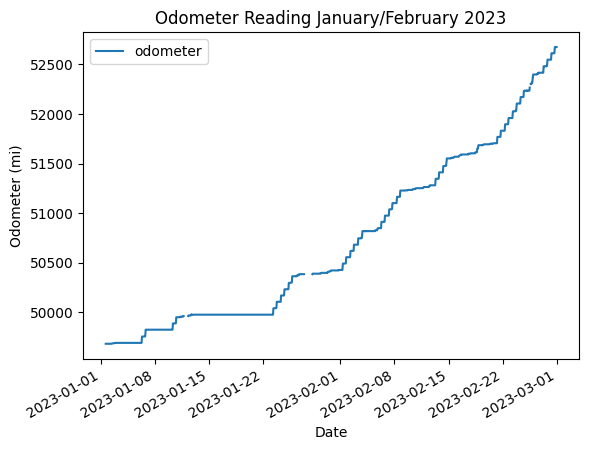

In [13]:
TF_resample.plot(x="Date", y="odometer", xlabel="Date", ylabel="Odometer (mi)")
plt.title("Odometer Reading January/February 2023")


<b>Visualization 4:<br></b>
This visualization shows the temperature set inside the vehicle compared to the outdoor temperature.

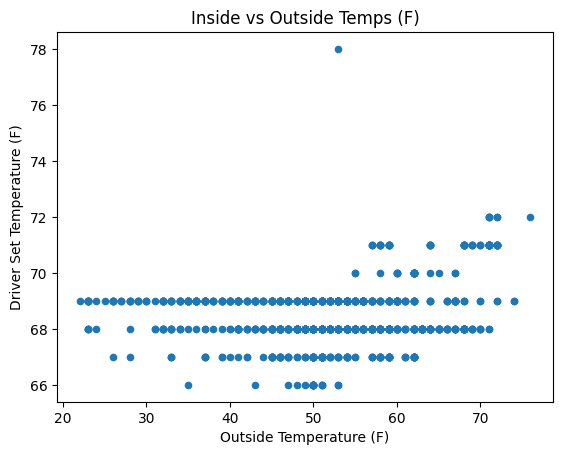

In [14]:
TF_resample["outside_tempF"] = TF_resample["outside_tempF"].replace("None", np.nan).astype(float)
TF_resample["driver_temp_settingF"] = TF_resample["driver_temp_settingF"].replace("None", np.nan).astype(float)
TF_resample.plot(x="outside_tempF", y="driver_temp_settingF", kind="scatter", xlabel="Outside Temperature (F)", ylabel="Driver Set Temperature (F)")
plt.title('Inside vs Outside Temps (F)')

plt.show()

The below shows mean inside and outside temperatures; and, is displayed in simple text field.

In [15]:
TF_resample['inside_tempF'] = pd.to_numeric(TF_resample['inside_tempF'], errors='coerce')
mean_inside_tempF = TF_resample['inside_tempF'].mean()
mean_inside_tempF

61.825

In [16]:
TF_resample['outside_tempF'] = pd.to_numeric(TF_resample['outside_tempF'], errors='coerce')
mean_outside_tempF = TF_resample['outside_tempF'].mean()
mean_outside_tempF

52.21969696969697

In [17]:
print(f"Other information noticed include: average outside temperature for January and February, where the car was located, was {mean_outside_tempF:.0f} degrees Fahrenheit; and, the average set temperature inside the car was {mean_inside_tempF:.0f} degrees Fahrenheit.")

Other information noticed include: average outside temperature for January and February, where the car was located, was 52 degrees Fahrenheit; and, the average set temperature inside the car was 62 degrees Fahrenheit.
